# CHALLENGE #1: P>N

Required Depndencies:

In [ ]:
# pip install numpy
# pip install pandas
# pip install matplotlib
# pip install seaborn
# pip install scikit-learn
# pip install Jinja2
# pip install keras
# pip install tensorflow
# pip install statsmodels

## Import libraries

In [1]:
# Import your libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading in the dataset

In [3]:
df = pd.read_csv('data.csv')
df.head(10)

,id,train,target_eval,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_291,var_292,var_293,var_294,var_295,var_296,var_297,var_298,var_299,var_300
0,1,1,1,0.422,0.521,0.493,0.206,0.144,0.203,0.709,...,0.188,0.143,0.432,0.872,0.282,0.152,0.878,0.750,0.670,0.358
1,2,1,0,0.345,0.974,0.330,0.643,0.931,0.664,0.146,...,0.164,0.676,0.647,0.437,0.853,0.908,0.141,0.705,0.974,0.240
2,3,1,1,0.590,0.135,0.046,0.852,0.655,0.765,0.261,...,0.147,0.822,0.769,0.743,0.293,0.806,0.610,0.172,0.825,0.330
3,4,1,1,0.226,0.952,0.773,0.070,0.800,0.320,0.081,...,0.155,0.240,0.553,0.102,0.092,0.016,0.785,0.320,0.548,0.888
4,5,1,0,0.250,0.698,0.781,0.060,0.427,0.096,0.176,...,0.699,0.765,0.946,0.112,0.744,0.181,0.861,0.383,0.570,0.777
5,6,1,1,0.446,0.065,0.008,0.224,0.448,0.976,0.629,...,0.432,0.818,0.120,0.994,0.421,0.298,0.857,0.133,0.093,0.342
6,7,1,0,0.729,0.904,0.545,0.137,0.516,0.862,0.386,...,0.322,0.586,0.366,0.673,0.819,0.188,0.341,0.625,0.862,0.246
7,8,1,0,0.169,0.427,0.296,0.765,0.131,0.002,0.643,...,0.747,0.854,0.695,0.149,0.744,0.704,0.151,0.089,0.074,0.717
8,9,1,0,0.197,0.979,0.061,0.505,0.665,0.279,0.595,...,0.613,0.750,0.932,0.013,0.220,0.728,0.644,0.455,0.238,0.603
9,10,1,0,0.465,0.981,0.983,0.685,0.678,0.553,0.552,...,0.317,0.863,0.225,0.147,0.221,0.901,0.105,0.536,0.300,0.674


In [4]:
# Check for any missing values. Since it's False, that means we don't have to dropna or impute any missing values. 
df.isnull().values.any()

False

In [5]:
# df.info
# df.describe

In [6]:
# Split the dataset into train dataset and test dataset
train_set = df[df['train']==1]
test_set = df[df['train']==0]

In [7]:
# Verify the number of training dataset and testing dataset
len_train = len(train_set)
len_test = len(test_set)

print(f'The number of training dataset is: {len_train}')
print(f'The number of testing dataset is: {len_test}')

The number of training dataset is: 250
The number of testing dataset is: 19750


For our train/test split, we can drop the train feature because all it tells us is which part of the dataset are train data vs testing dataset. Note that in the challenge stated that there are 250 training datas and 19750 testing data. Meaning, this feature won't help us in the prediction analysis part of our target variable. 

In [8]:
train_set = train_set.drop('train',axis=1)
test_set = test_set.drop('train',axis=1)

It seems that no transformation like StandardScaler or MinMaxScaler seems to be needed in this assessment, since all the target attributes seems to be bound between 0 and 1. If there were overfitting that are noticed in our Machine Learning model, then we can try incorporating it. 

In [9]:
# Split our dataset into X and y
X = train_set.drop('target_eval',axis=1)
y = train_set['target_eval']

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X_new = SelectKBest(f_classif, k=100).fit_transform(X,y)
X_new.shape

(250, 100)

## Feature Selection

We'll use SelectKBest features with f_classif for our Feature Selection method.

In [11]:
bestfeatures = SelectKBest(k=100, score_func=f_classif)
fit = bestfeatures.fit(X,y)
df_columns = pd.DataFrame(X.columns)
df_scores = pd.DataFrame(fit.scores_)

feature_scores_df = pd.concat([df_columns, df_scores], axis=1)
feature_scores_df = feature_scores_df.dropna()
feature_scores_df.columns = ['Specs','Score']

top100 = feature_scores_df.nlargest(100, 'Score').set_index('Specs')
top100

,Score
Specs,
var_180,13.870855
var_172,12.964053
var_219,11.137178
var_77,10.687868
var_252,9.649807
...,...
var_208,1.330205
var_233,1.312750
var_166,1.274114


The higher the value, the more significant the feature is to the model. If we look at the bottom features (shown below), we can see that these functions that have a score of 0, which means they don't play a major part in the model, so we can drop those features.

In [12]:
feature_scores_df.nlargest(300, 'Score').set_index('Specs')

,Score
Specs,
var_180,13.870855
var_172,12.964053
var_219,11.137178
var_77,10.687868
var_252,9.649807
...,...
var_85,0.000896
var_69,0.000235
var_238,0.000197


There's a lot of features for our target variable. We can use PCA to compress our dataset while retaining 95% of variance to speed up our ML models.

In [13]:
top100.index

Index(['var_180', 'var_172', 'var_219', 'var_77', 'var_252', 'var_203',
       'var_170', 'var_239', 'var_271', 'var_117', 'var_93', 'var_198',
       'var_116', 'var_286', 'var_276', 'var_181', 'var_138', 'var_40',
       'var_247', 'var_53', 'var_294', 'var_253', 'var_249', 'var_270',
       'var_298', 'var_195', 'var_119', 'var_153', 'var_71', 'var_29',
       'var_218', 'var_127', 'var_1', 'var_50', 'var_4', 'var_57', 'var_258',
       'var_19', 'var_34', 'var_157', 'var_223', 'var_272', 'var_282',
       'var_78', 'var_204', 'var_296', 'var_13', 'var_199', 'var_186',
       'var_10', 'var_281', 'var_112', 'var_235', 'var_28', 'var_168',
       'var_58', 'var_63', 'var_45', 'var_237', 'var_288', 'var_60', 'var_70',
       'var_42', 'var_131', 'var_178', 'var_236', 'var_275', 'var_179',
       'var_158', 'var_206', 'var_151', 'var_31', 'var_139', 'var_15',
       'var_222', 'var_224', 'var_257', 'var_84', 'var_279', 'var_26',
       'var_62', 'var_291', 'var_143', 'var_64', 'var_43'

In [14]:
X1 = train_set[['var_180', 'var_172', 'var_219', 'var_77', 'var_252', 'var_203',
       'var_170', 'var_239', 'var_271', 'var_117', 'var_93', 'var_198',
       'var_116', 'var_286', 'var_276', 'var_181', 'var_138', 'var_40',
       'var_247', 'var_53', 'var_294', 'var_253', 'var_249', 'var_270',
       'var_298', 'var_195', 'var_119', 'var_153', 'var_71', 'var_29',
       'var_218', 'var_127', 'var_1', 'var_50', 'var_4', 'var_57', 'var_258',
       'var_19', 'var_34', 'var_157', 'var_223', 'var_272', 'var_282',
       'var_78', 'var_204', 'var_296', 'var_13', 'var_199', 'var_186',
       'var_10', 'var_281', 'var_112', 'var_235', 'var_28', 'var_168',
       'var_58', 'var_63', 'var_45', 'var_237', 'var_288', 'var_60', 'var_70',
       'var_42', 'var_131', 'var_178', 'var_236', 'var_275', 'var_179',
       'var_158', 'var_206', 'var_151', 'var_31', 'var_139', 'var_15',
       'var_222', 'var_224', 'var_257', 'var_84', 'var_279', 'var_26',
       'var_62', 'var_291', 'var_143', 'var_64', 'var_43', 'var_269', 'var_76',
       'var_164', 'var_200', 'var_182', 'var_201', 'var_126', 'var_66',
       'var_184', 'var_12', 'var_208', 'var_233', 'var_166', 'var_255',
       'var_287']]
X1

,var_180,var_172,var_219,var_77,var_252,var_203,var_170,var_239,var_271,var_117,...,var_201,var_126,var_66,var_184,var_12,var_208,var_233,var_166,var_255,var_287
0,0.101,0.475,0.000,0.205,0.485,0.603,0.428,0.095,0.629,0.131,...,0.354,0.568,0.551,0.317,0.001,0.324,0.835,0.674,0.008,0.281
1,0.801,0.727,0.301,0.260,0.866,0.886,0.302,0.355,0.881,0.669,...,0.320,0.733,0.597,0.607,0.817,0.324,0.847,0.984,0.902,0.275
2,0.407,0.625,0.392,0.518,0.010,0.891,0.765,0.261,0.265,0.195,...,0.382,0.152,0.006,0.698,0.731,0.406,0.716,0.573,0.856,0.385
3,0.271,0.770,0.253,0.483,0.887,0.919,0.770,0.031,0.265,0.507,...,0.928,0.223,0.219,0.571,0.974,0.829,0.299,0.262,0.223,0.391
4,0.515,0.298,0.339,0.535,0.772,0.292,0.799,0.929,0.555,0.552,...,0.226,0.283,0.424,0.465,0.731,0.508,0.047,0.637,0.490,0.921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.777,0.604,0.759,0.847,0.416,0.435,0.211,0.248,0.978,0.248,...,0.565,0.717,0.196,0.976,0.435,0.335,0.193,0.074,0.428,0.225
246,0.541,0.938,0.333,0.929,0.872,0.424,0.823,0.143,0.939,0.336,...,0.725,0.816,0.902,0.726,0.405,0.756,0.121,0.154,0.117,0.615
247,0.371,0.238,0.849,0.690,0.194,0.169,0.318,0.646,0.297,0.316,...,0.995,0.015,0.554,0.808,0.359,0.257,0.221,0.703,0.320,0.699
248,0.764,0.633,0.404,0.865,0.496,0.579,0.991,0.652,0.458,0.307,...,0.665,0.119,0.229,0.022,0.191,0.806,0.495,0.388,0.277,0.715


In [15]:
# Here, we can split both our training set using train_test_split on our feature selected dataset.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1,y,test_size=0.2, random_state=42)

In [16]:
# Check if our dimension for train and test set is correct
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(200, 100) (50, 100) (200,) (50,)


## Principal Component Space (PCA)

Here, since our dataset has a lot of features, it would be helpful to reduce our model complexity by introducing PCA. We retain 95% explained variance.

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
pcomp = pca.fit(X_train)

In [18]:
# number of principal components projected in the Eigen space with 95% explained variance
len(pca.components_)

77

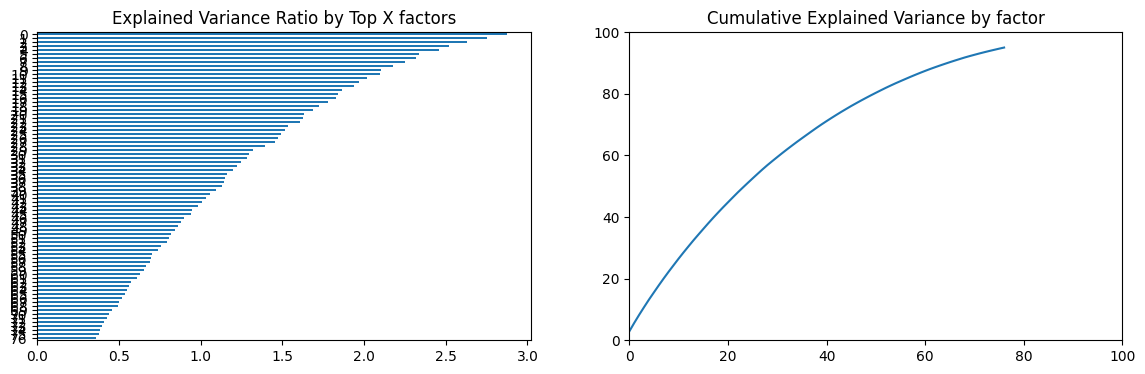

In [19]:
num_eigenvalues = 100
fig, axes = plt.subplots(ncols=2, figsize=(14,4))
Series1= pd.Series(pca.explained_variance_ratio_[:num_eigenvalues]).sort_values()*100
Series2 = pd.Series(pca.explained_variance_ratio_[:num_eigenvalues]).cumsum()*100

#Series1 will be hard to see, but if there were less target attributes to work with, you would be able to visually see it properly
Series1.plot.barh(ylim=(0,9), label='woohoo', title='Explained Variance Ratio by Top X factors', ax=axes[0]);
Series2.plot(ylim=(0,100),xlim=(0,100),ax=axes[1], title='Cumulative Explained Variance by factor');

If we uncomment this, we can see that at 77 Eigen values, we can expect to see 95% explained variance retained when using PCA, which is better than having 100 features (or 300 had we not performed feature selection) to go through, which time is always a constraint to the many machine learning models to loop through.

In [20]:
pd.Series(np.cumsum(pca.explained_variance_ratio_)).to_frame('Explained Variance').head(num_eigenvalues).style.format('{:,.2%}'.format)

,Explained Variance
0,2.88%
1,5.63%
2,8.26%
3,10.78%
4,13.23%
5,15.57%
6,17.88%
7,20.13%
8,22.30%
9,24.41%


In [21]:
X_train_PCA = pca.transform(X_train)
X_test_PCA = pca.transform(X_test)

Now we get to the fun part with various machine learning models and later explore the neural networks or Deep Learning models.

In [22]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier

In [23]:
models = []
models.append(('LR', LogisticRegression(n_jobs=-1)))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('NN', MLPClassifier()))
models.append(('AB', AdaBoostClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('ETC', ExtraTreesClassifier()))
models.append(('GBC', GradientBoostingClassifier()))

In [24]:
# Evaluation metrics:
num_folds = 10
scoring = 'roc_auc'

In [25]:
import warnings
warnings.filterwarnings('ignore')

## Model Selection

In [26]:
# K Fold Cross Validation WITH PCA
names = []
results = []
train_results = []
test_results = []

for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring=scoring)
    
    res = model.fit(X_train, y_train)
    train_result = roc_auc_score(res.predict(X_train), y_train)
    train_results.append(train_results)

    test_result = roc_auc_score(res.predict(X_test),y_test)
    test_results.append(test_result)

    names.append(name)
    results.append(cv_results)
    
    msg = "%s, %f (%f) %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(msg)


LR, 0.923316 (0.042986) 0.989999 0.844551
KNN, 0.777087 (0.108644) 0.876054 0.669082
CART, 0.507413 (0.120956) 1.000000 0.557471
NB, 0.889004 (0.071419) 0.949995 0.836538
NN, 0.847869 (0.095834) 1.000000 0.791667
AB, 0.751262 (0.111099) 1.000000 0.606732
RF, 0.780786 (0.107457) 1.000000 0.711397
ETC, 0.782378 (0.070804) 1.000000 0.676282
GBC, 0.662250 (0.120158) 1.000000 0.564103


In [27]:
# K Fold Cross Validation WITH PCA
names = []
results = []
train_results = []
test_results = []

for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train_PCA, y_train, cv = kfold, scoring=scoring)
    
    res = model.fit(X_train_PCA, y_train)
    train_result = roc_auc_score(res.predict(X_train_PCA), y_train)
    train_results.append(train_results)

    test_result = roc_auc_score(res.predict(X_test_PCA),y_test)
    test_results.append(test_result)

    names.append(name)
    results.append(cv_results)
    
    msg = "%s, %f (%f) %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(msg)


LR, 0.925316 (0.042324) 0.989999 0.844551
KNN, 0.773796 (0.128578) 0.846820 0.644231
CART, 0.573508 (0.075165) 1.000000 0.613636
NB, 0.790352 (0.118268) 0.950255 0.756410
NN, 0.911417 (0.057789) 1.000000 0.820000
AB, 0.873605 (0.089109) 1.000000 0.620000
RF, 0.815684 (0.107201) 1.000000 0.764423
ETC, 0.800874 (0.113546) 1.000000 0.773752
GBC, 0.815762 (0.099273) 1.000000 0.695246


From comparing our KFold Cross Validation, we can see that the KFold applied on our dataset from PCA had similar results.

We can see that: <br>
* Logistic Regression, Naive Bayes, and MLP had good ROC_AUC score in both training/testing set WITHOUT PCA.
* Only Logistic Regression had a good ROC_AUC score in both training/testing set with PCA.
* Most of the other algorithms fit our training set perfectly, but predicted poorly on our test set WITH and WITHOUT PCA, overfitted.. 

tldr: Our top candidates are Neural Network and Logistic Regression. We explore these ML algorithms further.

## Neural Network

In [28]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import AUC

model0 = Sequential()

# input layer
model0.add(Dense(100, activation='relu'))
# model0.add(Dropout(0.2))

# hidden layer
model0.add(Dense(50, activation='relu'))
# model0.add(Dropout(0.2))
model0.add(Dense(25, activation='relu'))

# output layyer
model0.add(Dense(1, activation='sigmoid'))

# compile model
model0.compile(loss='binary_crossentropy', optimizer='adam',metrics=[AUC()])

In [29]:
model0.fit(X_train, y_train, 
           epochs=100, batch_size=256,
           verbose=1, callbacks=[early_stop],
           validation_data=(X_test, y_test))

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.7064 - auc: 0.5062 - val_loss: 0.7036 - val_auc: 0.5267
Epoch 2/100
1/1 [==============================] - 0s 45ms/step - loss: 0.6900 - auc: 0.5579 - val_loss: 0.6876 - val_auc: 0.5600
Epoch 3/100
1/1 [==============================] - 0s 44ms/step - loss: 0.6813 - auc: 0.6174 - val_loss: 0.6798 - val_auc: 0.5758
Epoch 4/100
1/1 [==============================] - 0s 40ms/step - loss: 0.6753 - auc: 0.6679 - val_loss: 0.6771 - val_auc: 0.5867
Epoch 5/100
1/1 [==============================] - 0s 45ms/step - loss: 0.6694 - auc: 0.7188 - val_loss: 0.6775 - val_auc: 0.6017
Epoch 6/100
1/1 [==============================] - 0s 46ms/step - loss: 0.6626 - auc: 0.7542 - val_loss: 0.6806 - val_auc: 0.6008
Epoch 7/100
1/1 [==============================] - 0s 42ms/step - loss: 0.6552 - auc: 0.7842 - val_loss: 0.6837 - val_auc: 0.6175
Epoch 8/100
1/1 [==============================] - 0s 39ms/step - loss: 0.6482 - auc: 0.8111

In [30]:
model0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 16,451
Trainable params: 16,451
Non-trainable params: 0
_________________________________________________________________


<Axes: >

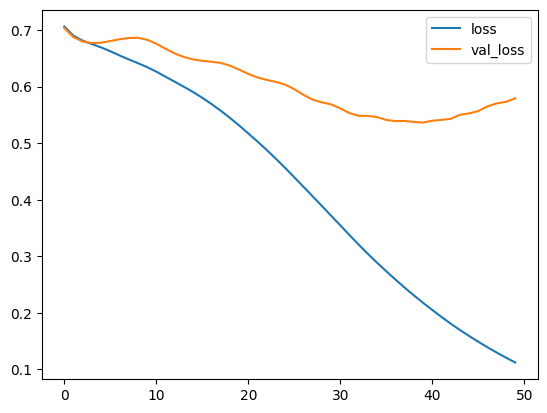

In [31]:
losses = pd.DataFrame(model0.history.history)
losses[['loss','val_loss']].plot()

In [32]:
predictions = model0.predict(X_test)
predictions = np.where(predictions < 0.5,0,1)
predictions[0:5]

2/2 [==============================] - 0s 2ms/step


array([[0],
       [1],
       [0],
       [1],
       [1]])

In [33]:
y_test.head(5)

142    0
6      0
97     0
60     0
112    0
Name: target_eval, dtype: int64

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc

false_positive_rate, recall, threshold = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, recall)

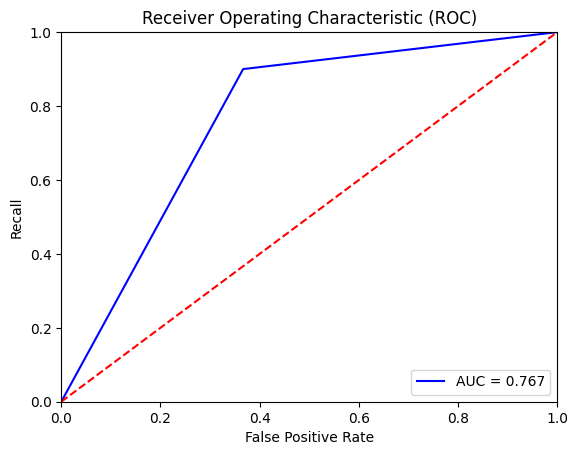

In [35]:
plt.figure()
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.3f' %roc_auc)

plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Recall')
plt.xlabel('False Positive Rate')
plt.show()

A score of 0.817 isn't terrible for a ROC_AUC score, however it would be considered barely good. TWe will explore

## Logistic Regression

In [36]:
LR = LogisticRegression(n_jobs=-1)
LR.fit(X_train_PCA, y_train)

LogisticRegression(n_jobs=-1)

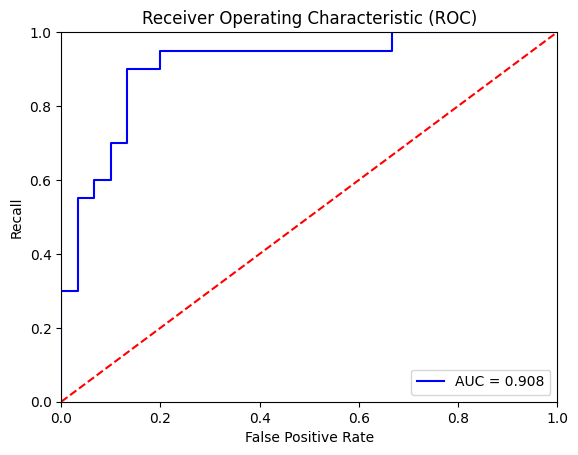

In [37]:
probs = LR.predict_proba(X_test_PCA)
preds = probs[:,1]

false_positive_rate, recall, threshold = roc_curve(y_test, preds)
roc_auc = auc(false_positive_rate, recall)

plt.figure()
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.3f' %roc_auc)

plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Recall')
plt.xlabel('False Positive Rate')
plt.show()

With default Logistic Regression parameter, our test data with PCA had a good AUC score of 0.908. We can most likely improve this with GridSearchCV.

In [38]:
# LogisticRegression?

In [39]:
from sklearn.model_selection import GridSearchCV

penalty = ['l2', 'l1']
solver = ['liblinear']
C = [0.001, 0.01, 0.05, 0.1, 0.5, 1, 10, 100, 1000]
param_grid = dict(penalty=penalty, solver=solver, C=C)
model_0 = LogisticRegression()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model_0, param_grid=param_grid, scoring='roc_auc', return_train_score=True, n_jobs=-1)
grid_result = grid.fit(X_train_PCA, y_train)

In [40]:
grid_result.best_score_

0.9339473684210526

In [41]:
grid_result.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

In [42]:
LR = LogisticRegression(penalty='l2',solver='liblinear', C=0.1)
LR.fit(X_train_PCA, y_train)
new_test_pred = LR.predict(X_test_PCA)

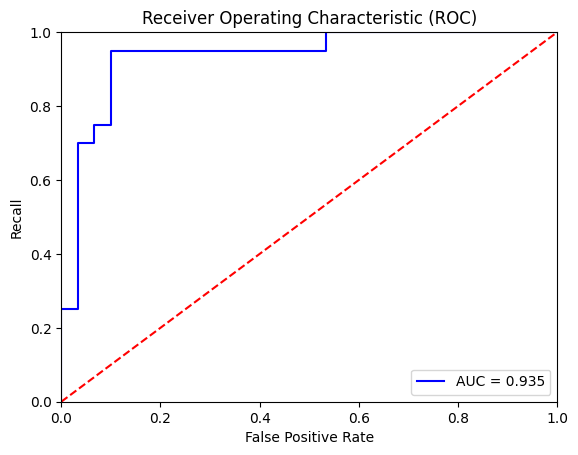

In [43]:
probs = LR.predict_proba(X_test_PCA)
preds = probs[:,1]

false_positive_rate, recall, threshold = roc_curve(y_test, preds)
roc_auc = auc(false_positive_rate, recall)

plt.figure()
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.3f' %roc_auc)

plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Recall')
plt.xlabel('False Positive Rate')
plt.show()

On default Logistic Regression parameter, our AUC score was 0.908. <br>
On GridSearchCV Logistic Regression parameter, our AUC score is 0.935 (an increase of 0.027).

We can check out other metrics like accuracy and look at the confusion matrix.

In [44]:
print(accuracy_score(y_test, new_test_pred))

0.86


<Axes: xlabel='Predicted', ylabel='Actual'>

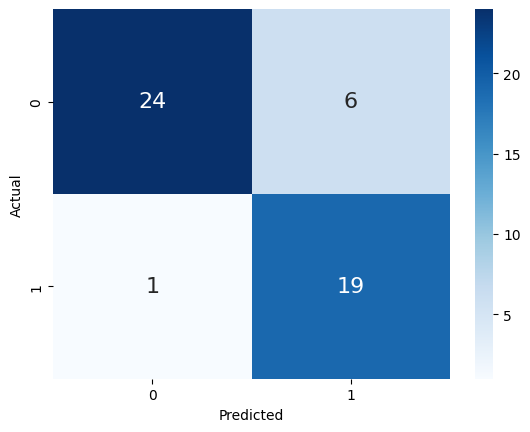

In [45]:
df_cm = pd.DataFrame(confusion_matrix(y_test, new_test_pred), columns=np.unique(y_test), index=np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap='Blues', annot=True, annot_kws={"size":16})

## Finalizing our actual "TEST" dataset (19750 rows)

In [46]:
X1_final = test_set[['var_180', 'var_172', 'var_219', 'var_77', 'var_252', 'var_203',
       'var_170', 'var_239', 'var_271', 'var_117', 'var_93', 'var_198',
       'var_116', 'var_286', 'var_276', 'var_181', 'var_138', 'var_40',
       'var_247', 'var_53', 'var_294', 'var_253', 'var_249', 'var_270',
       'var_298', 'var_195', 'var_119', 'var_153', 'var_71', 'var_29',
       'var_218', 'var_127', 'var_1', 'var_50', 'var_4', 'var_57', 'var_258',
       'var_19', 'var_34', 'var_157', 'var_223', 'var_272', 'var_282',
       'var_78', 'var_204', 'var_296', 'var_13', 'var_199', 'var_186',
       'var_10', 'var_281', 'var_112', 'var_235', 'var_28', 'var_168',
       'var_58', 'var_63', 'var_45', 'var_237', 'var_288', 'var_60', 'var_70',
       'var_42', 'var_131', 'var_178', 'var_236', 'var_275', 'var_179',
       'var_158', 'var_206', 'var_151', 'var_31', 'var_139', 'var_15',
       'var_222', 'var_224', 'var_257', 'var_84', 'var_279', 'var_26',
       'var_62', 'var_291', 'var_143', 'var_64', 'var_43', 'var_269', 'var_76',
       'var_164', 'var_200', 'var_182', 'var_201', 'var_126', 'var_66',
       'var_184', 'var_12', 'var_208', 'var_233', 'var_166', 'var_255',
       'var_287']]
X_PCA = pca.transform(X1_final)
len(pca.components_)
final_pred = LR.predict(X_PCA)

In [47]:
final_probs = LR.predict_proba(X_PCA)

In [48]:
test_set['target_eval'] = final_pred
test_set['proba_class_0'] = final_probs[:,0]
test_set['proba_class_1'] = final_probs[:,1]

## Save our final csv file :)

In [54]:
test_set[['id','target_eval','proba_class_0','proba_class_1']].to_csv('final_pred.csv',index=False)